In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # For data manipulation
import rampy as rp #Charles' libraries and functions
from scipy.optimize import curve_fit

In [3]:
df=pd.read_csv("../data/FTIR_ana/Ftir_Data.csv",header=0,sep=',')
df.head()

,Wavenumber (cm-1),Biochar Hummers,Wavenumber (cm-1).1,Biochar Oxidizer,Wavenumber (cm-1).2,Coal EL Hummers,Wavenumber (cm-1).3,Coal EL Oxidizer,Wavenumber (cm-1).4,Coal EL Hummers Char,Wavenumber (cm-1).5,Coal EL Oxidizer Char,Wavenumber (cm-1).6,Coal Hummers,Wavenumber (cm-1).7,Coal Oxidizer,Wavenumber (cm-1).8,Coal Char Hummers,Wavenumber (cm-1).9,Coal Char Oxidizer
0,4000,0.0000,4000,0.0000,4000,0.0000,4000,0.0000,4000,0.0000,4000,0.0000,4000,0.0000,4000,0.0000,4000,0.0000,4000,0.0000
1,3999,-0.0002,3999,0.0000,3999,0.0000,3999,0.0000,3999,0.0000,3999,-0.0001,3999,0.0000,3999,0.0000,3999,-0.0001,3999,0.0000
2,3998,-0.0006,3998,0.0001,3998,-0.0001,3998,-0.0001,3998,-0.0001,3998,-0.0002,3998,-0.0001,3998,-0.0001,3998,-0.0001,3998,0.0000
3,3997,-0.0013,3997,0.0000,3997,-0.0001,3997,-0.0001,3997,-0.0001,3997,-0.0003,3997,-0.0001,3997,-0.0001,3997,-0.0001,3997,-0.0001
4,3996,-0.0020,3996,-0.0004,3996,-0.0001,3996,-0.0001,3996,-0.0002,3996,-0.0004,3996,-0.0001,3996,-0.0001,3996,-0.0001,3996,-0.0002


In [4]:
# df = df.drop(df.columns[2::2],1)
df.head()

,Wavenumber (cm-1),Biochar Hummers,Biochar Oxidizer,Coal EL Hummers,Coal EL Oxidizer,Coal EL Hummers Char,Coal EL Oxidizer Char,Coal Hummers,Coal Oxidizer,Coal Char Hummers,Coal Char Oxidizer
0,4000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,3999,-0.0002,0.0000,0.0000,0.0000,0.0000,-0.0001,0.0000,0.0000,-0.0001,0.0000
2,3998,-0.0006,0.0001,-0.0001,-0.0001,-0.0001,-0.0002,-0.0001,-0.0001,-0.0001,0.0000
3,3997,-0.0013,0.0000,-0.0001,-0.0001,-0.0001,-0.0003,-0.0001,-0.0001,-0.0001,-0.0001
4,3996,-0.0020,-0.0004,-0.0001,-0.0001,-0.0002,-0.0004,-0.0001,-0.0001,-0.0001,-0.0002


In [5]:
def minmax(y): return (y-y.min())/(y.max()-y.min())

In [6]:
x = df['Wavenumber (cm-1)']

y_ch = minmax(df['Coal Hummers'])
y_cch = minmax(df['Coal Char Hummers'])
y_co = minmax(df['Coal Oxidizer'])
y_cco = minmax(df['Coal Char Oxidizer'])

In [7]:
standardFonts = {'family' : 'Arial',
                 'size' : 14}

subplotLabels = {'fontsize': rcParams['axes.titlesize'],
                 'fontweight' : 'bold',
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'left'}
    
matplotlib.rc('font', **standardFonts)
mpl.rcParams['mathtext.fontset']  = 'dejavuserif'
mpl.rcParams['font.family']       = 'Arial'
matplotlib.rc('font', **standardFonts)

mpl.rcParams['xtick.major.size']  = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size']  = 4
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.direction']   = 'in'
mpl.rcParams['xtick.top']         = True
mpl.rcParams['xtick.bottom']      = True
mpl.rcParams['xtick.labelsize']   = 16
mpl.rcParams['ytick.major.size']  = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size']  = 4
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.direction']   = 'in'
mpl.rcParams['ytick.left']        = True
mpl.rcParams['ytick.right']       = True
mpl.rcParams['ytick.labelsize']   = 16

mpl.rcParams['axes.linewidth']    = 2
mpl.rcParams['axes.titlesize']    = 20
mpl.rcParams['axes.titleweight']  = 'bold'
mpl.rcParams['axes.labelweight']  = 'bold'
mpl.rcParams['axes.labelsize']    = 16

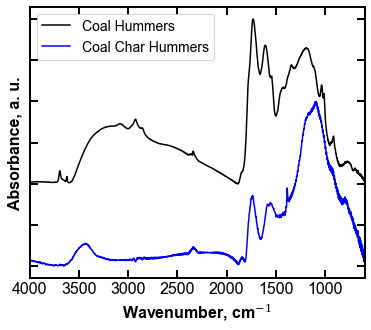

In [17]:
fig, ax = plt.subplots(1, figsize=(6, 5))
ax.xaxis.set_major_locator(MultipleLocator(2000))
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.set_yticklabels([])
plt.xlim(x.min(),x.max())

plt.plot(x,y_ch+y_cch.max()/2,'k',label='Coal Hummers')
plt.plot(x,y_cch,'b',label='Coal Char Hummers')

plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 16)
plt.ylabel("Absorbance, a. u.", fontsize = 16)
plt.gca().invert_xaxis()
plt.legend()

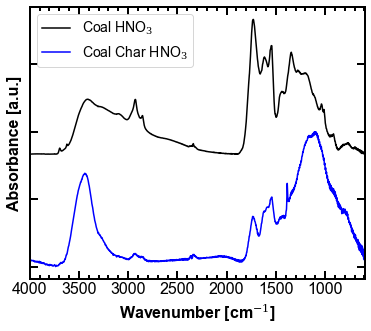

In [10]:
fig, ax = plt.subplots(1, figsize=(6, 5))
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_yticklabels([])
plt.xlim(x.min(),x.max())

plt.plot(x,y_co+y_cco.max()/1.2,'k',label='Coal HNO$_{3}$')
plt.plot(x,y_cco,'b',label='Coal Char HNO$_{3}$')
plt.xlabel("Wavenumber [cm$^{-1}$]", fontsize = 16)
plt.ylabel("Absorbance [a.u.]", fontsize = 16)
plt.gca().invert_xaxis()

plt.legend()

plt.savefig('../data/FTIR_ana/fig3.png', format='png', dpi=300)

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 5))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.set_yticklabels([])

plt.plot(x,y_co+y_cco.max()/1.2,'k',label='Coal Hummers')
plt.plot(x,y_cco,'b',label='Coal Char Hummers')
plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 16)
plt.ylabel("Abs intensity, a. u.", fontsize = 16)
plt.gca().invert_xaxis()
plt.legend()

Text(0.5, 1.0, 'Fig. 3: Fitted Biochar Hummer ')

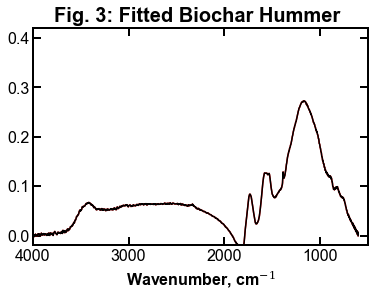

In [16]:
lb = 500 # The lower boundary of interest
hb = 4000 # The upper boundary of interest


#And let's plot the portion of interest before and after baseline subtraction:
# create a new plot for showing the spectrum
plt.figure()

plt.plot(1,2,2)
plt.plot(x,y,'r-')
plt.xlabel("Wavenumber, cm$^{-1}$")

plt.plot(x,y,'k-')

    
plt.xlim(lb,hb)
plt.gca().invert_xaxis()
plt.ylim(-0.02,0.42)
plt.xlabel("Wavenumber, cm$^{-1}$")
plt.title("Fig. 3: Fitted Biochar Hummer ")

Text(0.5, 1.0, 'Biochar')

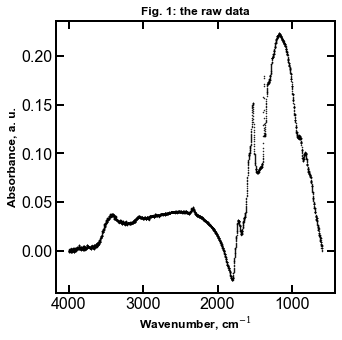

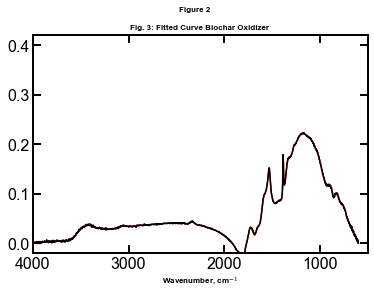

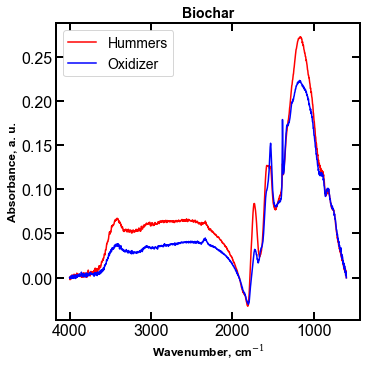

In [17]:
# Sample coal el oxidizer
x_o=Ftir[:,2]
y_o=Ftir[:,3]


# create a new plot for showing the spectrum
plt.figure(figsize=(5,5))
plt.plot(x_o,y_o,'k.',markersize=1)
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 12)
plt.gca().invert_xaxis()
plt.ylabel("Absorbance, a. u.", fontsize = 12)
plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")


lb = 500 # The lower boundary of interest
hb = 4000 # The upper boundary of interest


#And let's plot the portion of interest before and after baseline subtraction:
# create a new plot for showing the spectrum
plt.figure()

plt.plot(1,2,2)
plt.plot(x_o,y_o,'r-')
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 8)

#plt.tight_layout()
plt.suptitle('Figure 2', fontsize = 8,fontweight = 'bold')

    
plt.plot(x_o,y_o,'k-')

    
plt.xlim(lb,hb)
plt.gca().invert_xaxis()
plt.ylim(-0.02,0.42)
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 8)
plt.title("Fig. 3: Fitted Curve Biochar Oxidizer ",fontsize = 8,fontweight = "bold")



fig=plt.figure(figsize=(12,12))


#plt.plot(x_fit,y_fit_2,'r-',x_fit_o,y_fit_2_o,'k-')
plt.subplot(221)
Hummers = plt.plot(x,y,'r-',label='Hummers')
Oxidizer = plt.plot(x_o,y_o,'b-',label='Oxidizer')
plt.xlabel("Wavenumber, cm$^{-1}$", fontsize = 12)
plt.gca().invert_xaxis()
plt.ylabel("Absorbance, a. u.", fontsize = 12)
plt.title("Fig. 1: the raw data",fontsize = 12,fontweight="bold")
plt.legend()
plt.title("Biochar",fontsize = 14,fontweight = "bold")